<a href="https://colab.research.google.com/github/Arghya-UIT/college_ml/blob/main/class3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    age  income  student  credit   buy
0     3       0        0        1    0
1     3       0        0        0    0
2     1       0        0        1    1
3     2       2        1        1    1
4     2       1        2        1    1
5     2       1        2        0    0
6     0       1        2        0    1
7     3       2        0        1    0
8     3       1        2        1    1
9     2       2        2        1    1
10    3       2        2        0    1
11    1       2        0        0    1
12    0       0        2        1    1
13    2       2        0        0    0


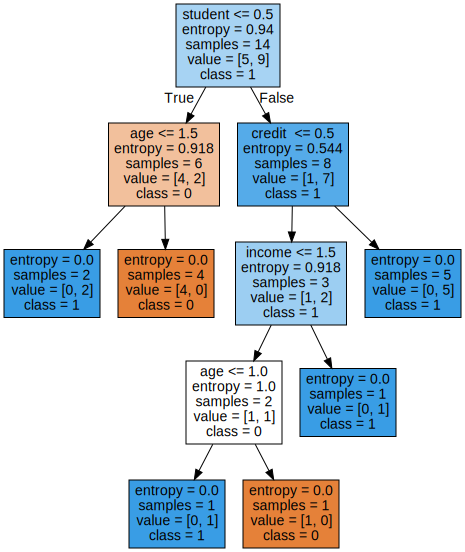

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.preprocessing import LabelEncoder



df =pd.read_csv('cls.csv')
encoder = LabelEncoder()

for col in df.select_dtypes(include=['object', 'category']):
    df[col] = encoder.fit_transform(df[col])

print(df)


X = df.drop('buy', axis=1)
y = df['buy']
# X = df.drop('Outcome', axis=1)
# y = df['Outcome']


clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X, y)
# print(X)
# print(y)
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns.astype(str) if X.columns.dtype != object else X.columns,
                           class_names=y.unique().astype(str),
                           filled=True,
                          )


graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph
